In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.cross_validation import cross_val_score

/Users/fanxu/anaconda2/envs/my-rdkit-env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
tmp_train_ = np.load('../Data/xtrain_mfccs.npy')
tmp_train_.shape

(6325, 40, 173)

In [3]:
tmp_test_ = np.load('../Data/xtest_mfccs.npy')
tmp_test_.shape

(1000, 40, 173)

In [4]:
t_train = np.load('../Data/y_train.npy').astype(int)

In [5]:
# t_train contains labels
# y_train contains one hot vectors
y_train = np.zeros((len(t_train),len(np.unique(t_train))))
t_train = t_train.flatten()
y_train[np.arange(len(t_train)), t_train] = 1
y_train.shape

(6325, 10)

(6325, 40)


<Container object of 3 artists>

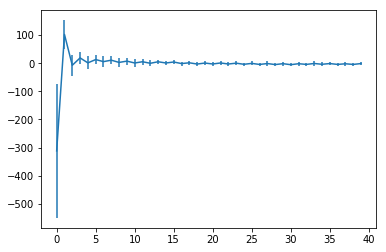

In [9]:
tmp_train = (np.mean(tmp_train_, axis=2))
print tmp_train.shape
plt.errorbar(range(tmp_train.shape[1]), np.mean(tmp_train, axis = 0), np.std(tmp_train, axis = 0))

(1000, 40)


<Container object of 3 artists>

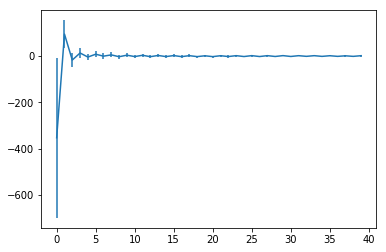

In [10]:
tmp_test = (np.mean(tmp_test_, axis=2))
print tmp_test.shape
plt.errorbar(range(tmp_test.shape[1]), np.mean(tmp_test, axis = 0), np.std(tmp_test, axis = 0))

In [11]:
##########################################

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
for n in range(1, 6):
    clf = KNeighborsClassifier(n_neighbors = n, algorithm = 'brute', n_jobs = -1)
    scores = cross_val_score(clf, tmp_train, t_train, cv=7)
    print "Neighbors: " + str(n) + ("\tAccuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

Neighbors: 1	Accuracy: 0.97565 (+/- 0.01298)
Neighbors: 2	Accuracy: 0.95415 (+/- 0.01475)
Neighbors: 3	Accuracy: 0.95620 (+/- 0.01241)
Neighbors: 4	Accuracy: 0.94055 (+/- 0.01330)
Neighbors: 5	Accuracy: 0.93675 (+/- 0.01758)


In [14]:
clf = KNeighborsClassifier(n_neighbors = 1, algorithm = 'brute', n_jobs = -1)

In [15]:
clf.fit(tmp_train, t_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
preds = clf.predict(tmp_test)

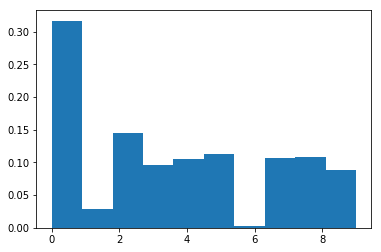

In [17]:
# Distribution of preds, should be similar as t_label
plt.hist(preds, bins=10, normed = True)
plt.show()

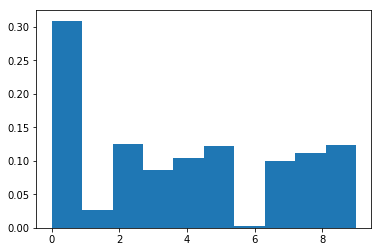

In [18]:
plt.hist(t_train, bins=10, normed = True)
plt.show()

In [19]:
result = np.vstack((range(len(preds)), preds)).T
df = pd.DataFrame(result)
df = df.astype(int)
df.to_csv('sample_result.csv', index=False, header=['Id', 'Prediction'])